In [1]:
import nltk
from bs4 import BeautifulSoup

In [2]:
b = BeautifulSoup(open('index.html', 'r').read())

/home/walrus/.virtualenvs/py3.6/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /usr/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [3]:
n = nltk.word_tokenize(b.text)

In [5]:
def word_positions(word):
    pos = []
    for i, w in enumerate(n):
        if w.lower() == word:
            pos += [i]
    return pos

def word_dists(pos):
    return [pos[i + 1] - pos[i] for i in range(len(pos) - 1)]

def words_stats(words):
    word_stats = {}
    for word in words:
        pos = word_positions(word)
        diffs = word_dists(pos)
        word_stats[word] = {'diffs': diffs, 'pos': pos}

    return word_stats

In [6]:
ws = words_stats(['the', 'cortex', 'brain', 'amygdala', 'neuron', 'female', 'hormone', 'maybe', 'dead'])

In [23]:
import numpy as np

def plot_words(words, stat, norm=True, log=True):
    ws = words_stats(words)
    fig,ax = plt.subplots(figsize=(20,10))
    for word in words:
        points = ws[word][stat]
        if norm:
            if log:
                ax.loglog(np.linspace(0,1, len(points)), points, '.')
            else:
                ax.plot(np.linspace(0,1, len(points)), points, '.')
        else:
            if log:
                ax.semilogx(points, '.')
            else:
                ax.plot(points, '.')
    ax.legend(words)

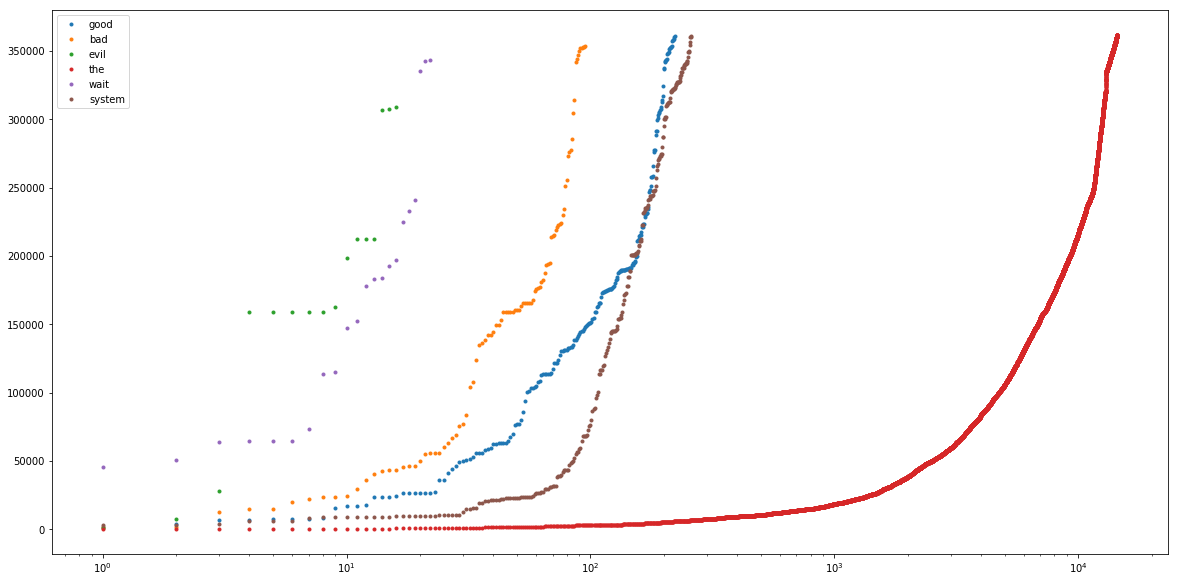

In [28]:
plot_words([ 'good', 'bad', 'evil', 'the', 'wait', 'system'], 'pos', False)

In [31]:
whist = nltk.FreqDist(n)

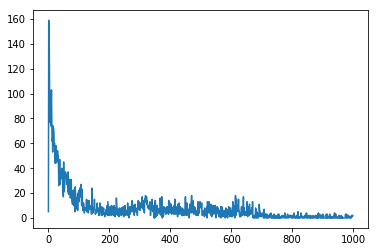

In [50]:
plt.plot([int(whist[str(i)]) for i in range(1000)])

In [68]:
whist['good']

195

In [69]:
evil = word_positions('good')

In [70]:
for epos in evil:
    print(str(epos) + ' => ' + ' '.join((n[epos-10:epos+10])) + '\n')

1445 => violence in the right context is different . We pay good money to watch it in a stadium , we

1686 => , and states , and when these are bad or good things . It is a book about the ways

3979 => The next quote : Normal psychic life depends upon the good functioning of brain synapses , and mental disorders appear

6751 => pure altruism actually exist ? Can you ever separate doing good from the expectation of reciprocity , public acclaim ,

7124 => , but another planet nonetheless . Crimes of passion and good acts of passion make the most sense to us

7449 => expository tastes . Nor will they be labeled as “ good ” and “ evil ” —too hot-blooded and frothy

7505 => and a behavior has happened . Perhaps it is a good act : you ’ ve empathically touched the arm

7543 => , targeting an innocent person . Perhaps it is a good act : you ’ ve pulled a trigger ,

8509 => which MacLean himself emphasized , this model will be a good organizing metaphor for us . THE LIMBIC SYSTEM To

15745 => 

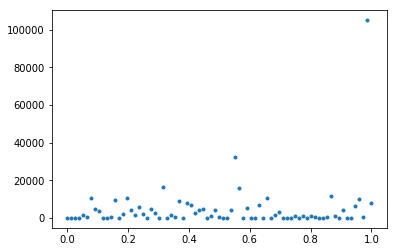

In [217]:
md = ws['maybe']['diffs']

plt.plot(np.linspace(0, 1, len(md)), np.array(md), '.')


In [88]:
for w in ws.keys():
    print(w, mean(ws[w]['diffs']),std(ws[w]['diffs']), mean(ws[w]['pos']), std(ws[w]['pos']))

the 25.003248324 38.3931494419 162667.368901 102807.28804
cortex 812.739819005 2184.65374369 141499.354402 118505.508343
brain 528.903367496 1126.43115256 167967.349415 113795.47728
amygdala 998.246418338 2786.06354809 133315.045714 119965.164196


In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


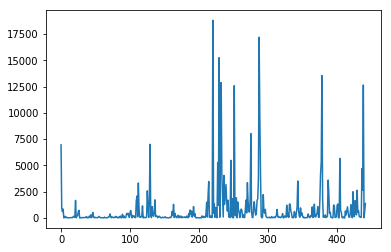

In [35]:
plt.plot(difs)

In [40]:
mean(difs)

812.73981900452486

In [37]:
max(diffs)

18816

In [38]:
len(diffs)

441